## Domain: Retail
### Dataset: Retail Superstore Category, City, Country, Customer ID, Sales, Segment, Shipping Cost, etc 

## Import Libraries and Load Data

In [54]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Load dataset
df = pd.read_csv('/Users/sankalp/Documents/AIML/MiniProjects/Python/superstore.csv')

df.head(5)

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


## Sanity Check
Handle missing values, duplicates, and data types

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [22]:
df.shape

(51290, 27)

In [23]:
#check null values
df.isnull().sum()


Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [24]:
df.isnull().sum()/df.shape[0]*100

Category          0.0
City              0.0
Country           0.0
Customer.ID       0.0
Customer.Name     0.0
Discount          0.0
Market            0.0
记录数               0.0
Order.Date        0.0
Order.ID          0.0
Order.Priority    0.0
Product.ID        0.0
Product.Name      0.0
Profit            0.0
Quantity          0.0
Region            0.0
Row.ID            0.0
Sales             0.0
Segment           0.0
Ship.Date         0.0
Ship.Mode         0.0
Shipping.Cost     0.0
State             0.0
Sub.Category      0.0
Year              0.0
Market2           0.0
weeknum           0.0
dtype: float64

In [25]:
#drop null values
df_clean = df.dropna()
df_clean

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,69,Corporate,2014-12-04 00:00:00.000,Same Day,5.15,California,Binders,2014,North America,49
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,9,Corporate,2014-12-04 00:00:00.000,Same Day,0.44,California,Binders,2014,North America,49
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,US,1,2014-12-18 00:00:00.000,CA-2014-106964,...,12,Home Office,2014-12-21 00:00:00.000,First Class,0.31,California,Binders,2014,North America,51
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,1,2014-12-25 00:00:00.000,CA-2014-145219,...,90,Home Office,2014-12-26 00:00:00.000,First Class,15.95,California,Binders,2014,North America,52


In [26]:
#check duplicates
df.duplicated().sum()

np.int64(0)

In [27]:
#lets find garbage value
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print('***'*10)

Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64
******************************
City
New York City            915
Los Angeles              747
Philadelphia             537
San Francisco            510
Santo Domingo            443
                        ... 
Hadera                     1
Morley                     1
Villeneuve-la-Garenne      1
Torremolinos               1
Redwood City               1
Name: count, Length: 3636, dtype: int64
******************************
Country
United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
South Sudan         2
Chad                2
Swaziland           2
Eritrea             2
Bahrain             2
Name: count, Length: 147, dtype: int64
******************************
Customer.ID
JG-158051    40
WB-218504    37
BC-111252    37
AF-108701    36
JG-158052    35
             ..
DK-33752      1
AA-3752       1
TG-1

## Exploratory Data Analysis

In [28]:
df.describe()

,Discount,记录数,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.0,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,1.0,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,0.0,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795
min,0.000000,1.0,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,1.0,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,1.0,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,1.0,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000


In [29]:
df.describe(include='object')

,Category,City,Country,Customer.ID,Customer.Name,Market,Order.Date,Order.ID,Order.Priority,Product.ID,Product.Name,Region,Segment,Ship.Date,Ship.Mode,State,Sub.Category,Market2
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,3,3636,147,4873,795,7,1430,25035,4,10292,3788,13,3,1464,4,1094,17,6
top,Office Supplies,New York City,United States,JG-158051,Muhammed Yedwab,APAC,2014-06-18 00:00:00.000,CA-2014-100111,Medium,OFF-AR-10003651,Staples,Central,Consumer,2014-11-22 00:00:00.000,Standard Class,California,Binders,APAC
freq,31273,915,9994,40,108,11002,135,14,29433,35,227,11117,26518,130,30775,2001,6152,11002


/var/folders/bh/w6ml95k53lxbwtw3sv8d84rm0000gn/T/ipykernel_4751/2314432604.py:25: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/bh/w6ml95k53lxbwtw3sv8d84rm0000gn/T/ipykernel_4751/2314432604.py:25: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/bh/w6ml95k53lxbwtw3sv8d84rm0000gn/T/ipykernel_4751/2314432604.py:25: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/sankalp/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sankalp/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.c

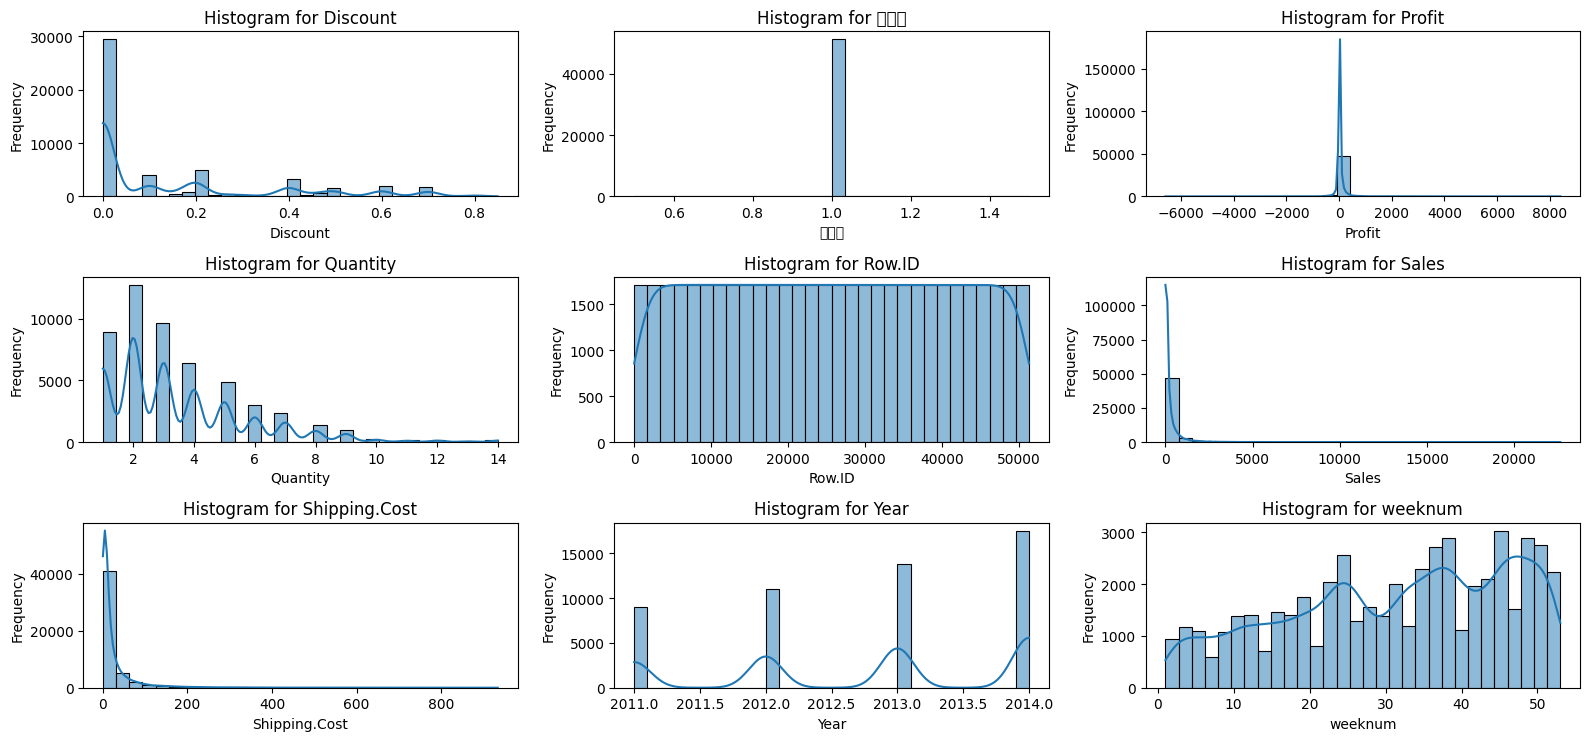

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Create a grid of 4x2
rows, cols = 5, 3
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))  # Adjust figure size for better visibility
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(data=df, x=col, kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide unused subplots if there are fewer numeric columns than grid spaces
for j in range(len(numeric_columns), len(axes)):
    axes[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

/var/folders/bh/w6ml95k53lxbwtw3sv8d84rm0000gn/T/ipykernel_4751/3420729827.py:24: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/bh/w6ml95k53lxbwtw3sv8d84rm0000gn/T/ipykernel_4751/3420729827.py:24: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/bh/w6ml95k53lxbwtw3sv8d84rm0000gn/T/ipykernel_4751/3420729827.py:24: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/sankalp/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sankalp/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.c

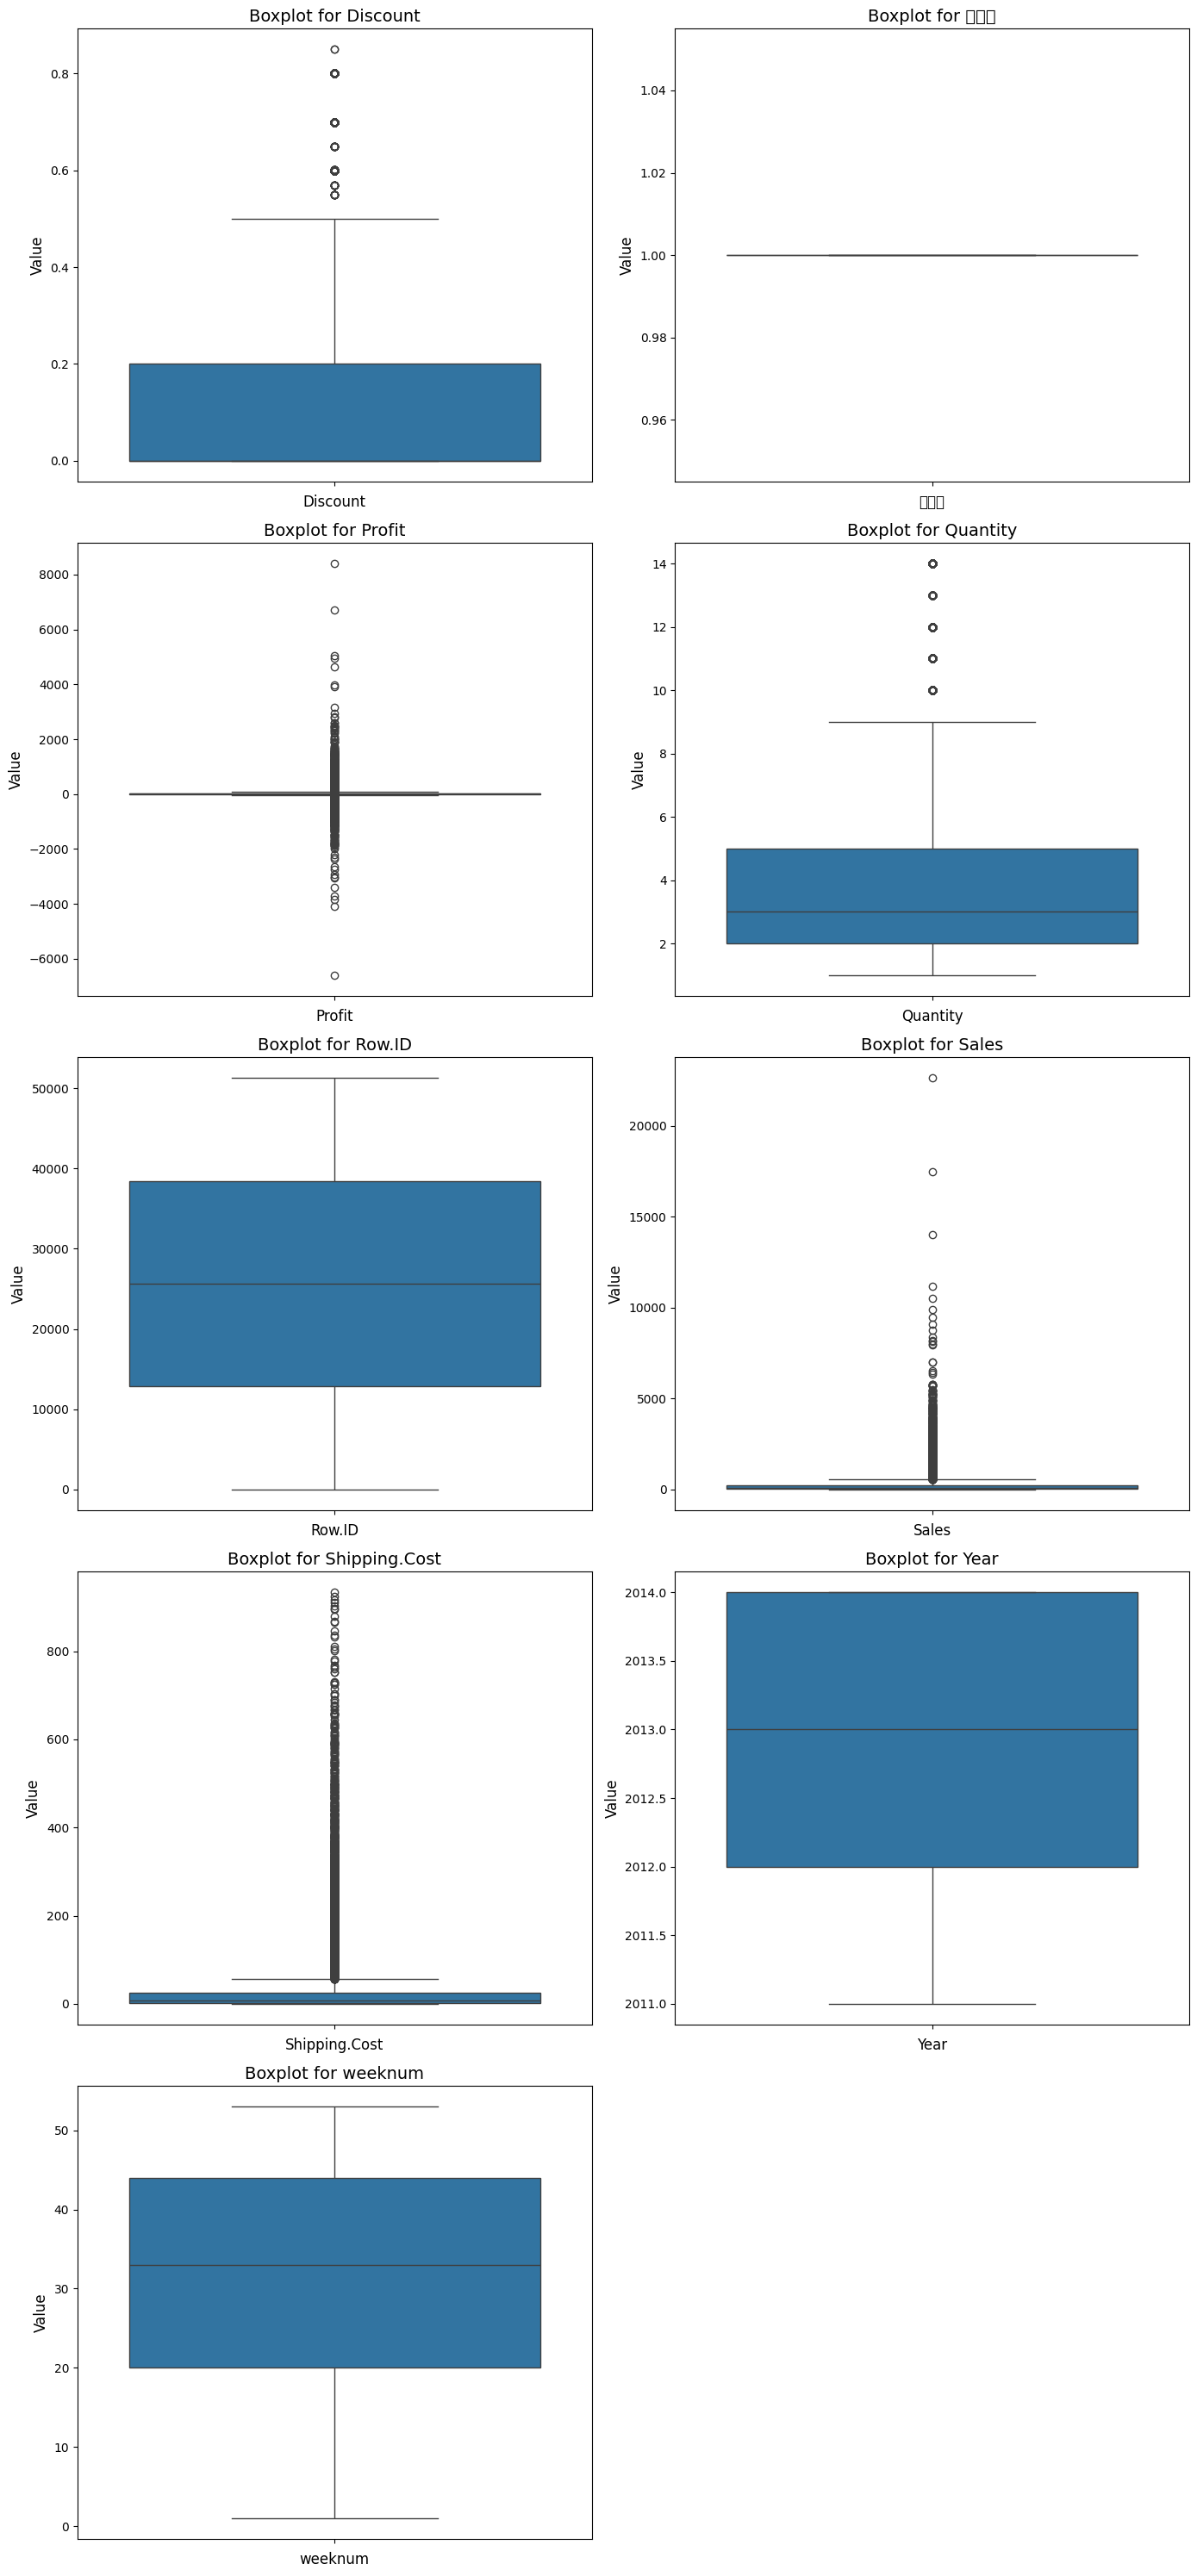

In [31]:
numeric_columns = df.select_dtypes(include='number').columns

# Calculate grid size dynamically
num_columns = len(numeric_columns)
cols = 2  # Number of columns in the grid
rows = math.ceil(num_columns / cols)  # Dynamically calculate rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 7, rows * 6))
axes = axes.flatten()  # Flatten the grid for easier iteration

# Plot each numeric column
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Value', fontsize=12)

# Hide unused subplots
for j in range(len(numeric_columns), len(axes)):
    axes[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

In [32]:
# Determine the number of rows containing outliers
df[df['Sales'] >= 6]['Sales'].value_counts().sum()

np.int64(50151)

## Univariate Analysis
Visualize individual features

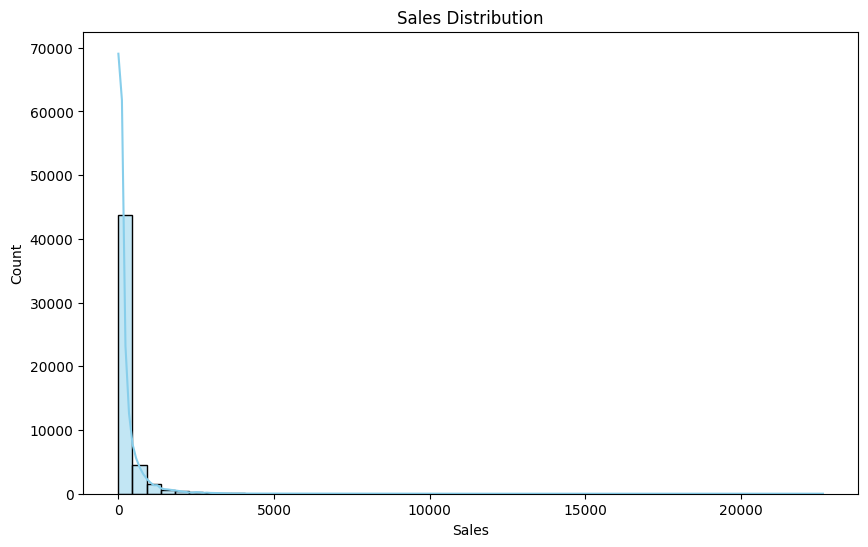

In [33]:
#Sales Distrubution
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Sales'], bins=50, kde=True, color='skyblue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

/var/folders/bh/w6ml95k53lxbwtw3sv8d84rm0000gn/T/ipykernel_4751/2274841878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df_clean, palette='viridis')


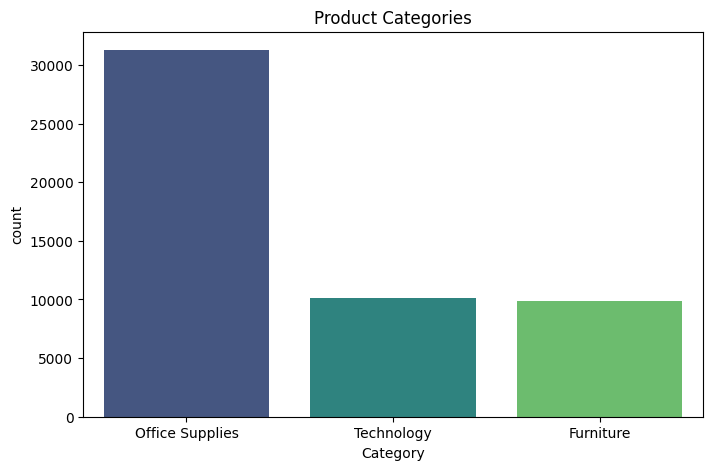

In [34]:
## Top Product Categories
plt.figure(figsize=(8, 5))
sns.countplot(x='Category', data=df_clean, palette='viridis')
plt.title('Product Categories')
plt.show()

## Bivariate Analysis
Understand relationships between variables

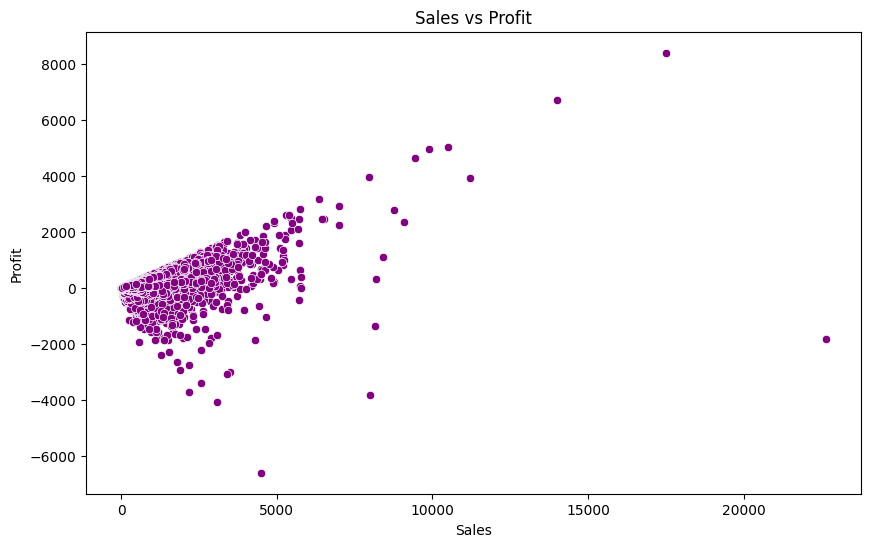

In [35]:
#Sales vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df_clean, color='purple')
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

/var/folders/bh/w6ml95k53lxbwtw3sv8d84rm0000gn/T/ipykernel_4751/1377555795.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Sales', data=df_clean, palette='coolwarm', estimator=np.sum)


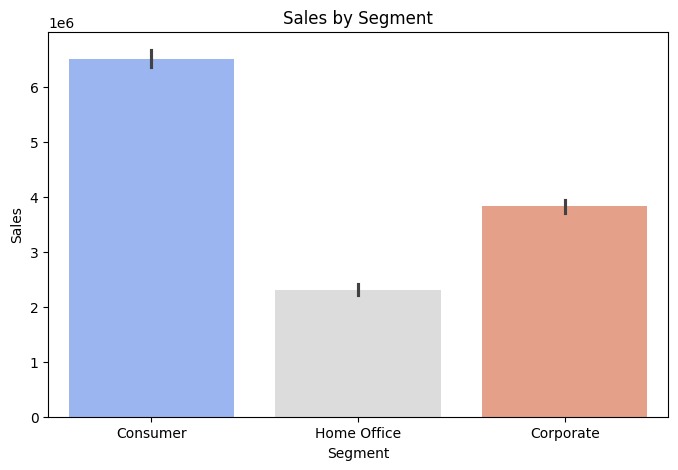

In [36]:
#Sales Across Segments
plt.figure(figsize=(8, 5))
sns.barplot(x='Segment', y='Sales', data=df_clean, palette='coolwarm', estimator=np.sum)
plt.title('Sales by Segment')
plt.show()

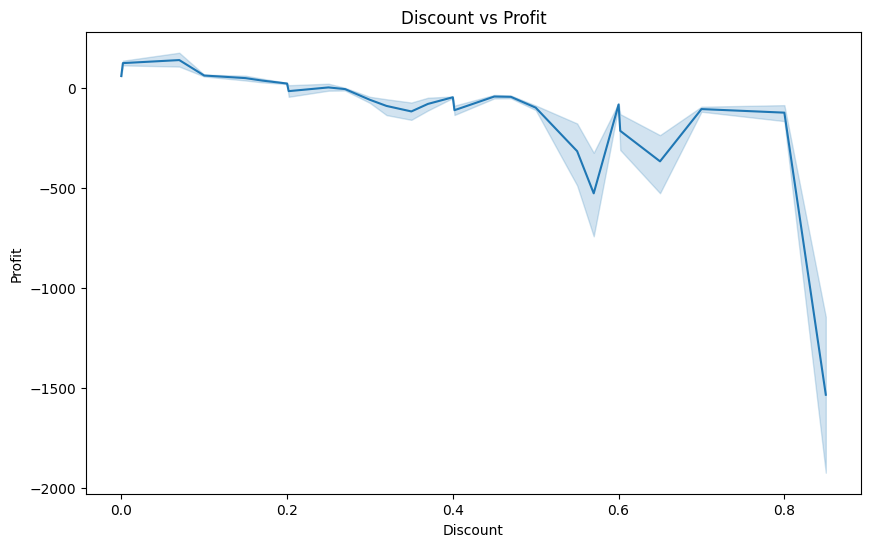

In [37]:
#Discount Impact on Profit
plt.figure(figsize=(10, 6))
sns.lineplot(x='Discount', y='Profit', data=df_clean)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

## Correlation Heatmap
Identify relationships between numeric variables

/Users/sankalp/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/sankalp/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/sankalp/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/sankalp/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sankalp/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.canvas.pri

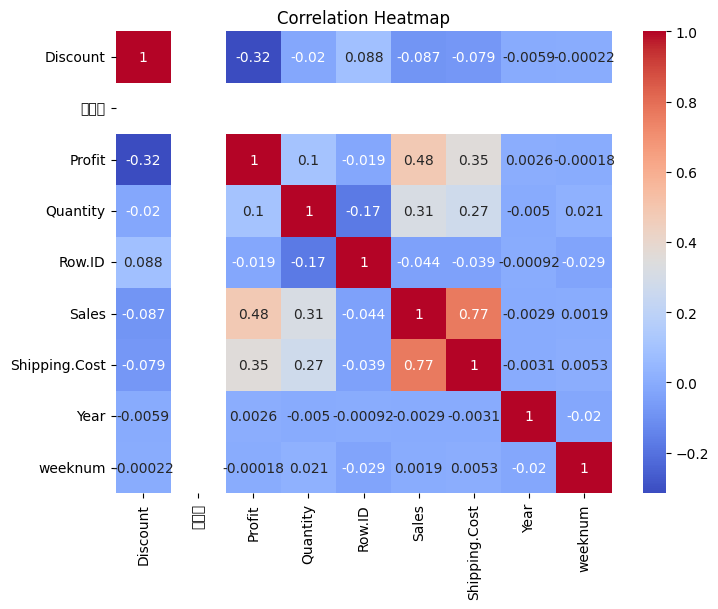

In [38]:
# Select only numeric columns
numeric_df = df_clean.select_dtypes(include=['number'])

# Compute correlation
correlation = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feeding data to the Machine Learning Model

## Ojective:  Prediction of profit, sales & quantity using Logistic Regression


In [39]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

selected_features = ['Country', 'Region', 'Segment', 'Discount', 'Quantity', 'Sales','Shipping.Cost', 'weeknum']
new_df = df[selected_features]
selected_df = new_df.sample(n=5000, random_state=42)
selected_df

,Country,Region,Segment,Discount,Quantity,Sales,Shipping.Cost,weeknum
49728,United States,East,Consumer,0.20,3,17,2.400,13
45547,Australia,Oceania,Corporate,0.10,7,160,8.810,51
15664,Romania,EMEA,Corporate,0.00,2,18,1.000,50
40561,Portugal,South,Consumer,0.50,5,34,1.300,35
49426,United States,South,Corporate,0.20,1,56,8.080,37
...,...,...,...,...,...,...,...,...
42178,Indonesia,Southeast Asia,Consumer,0.17,3,75,5.230,24
16695,Mexico,North,Consumer,0.00,6,56,1.765,52
27814,United States,Central,Corporate,0.00,9,144,33.690,48
9234,China,North Asia,Consumer,0.00,3,154,46.000,17


In [40]:
#Remove special characters from features

selected_df[selected_df.select_dtypes(include=['object']).columns] = selected_df.select_dtypes(include=['object']).apply(lambda col: col.str.strip().str.replace(r'[^\w\s]', '', regex=True))
selected_df

,Country,Region,Segment,Discount,Quantity,Sales,Shipping.Cost,weeknum
49728,United States,East,Consumer,0.20,3,17,2.400,13
45547,Australia,Oceania,Corporate,0.10,7,160,8.810,51
15664,Romania,EMEA,Corporate,0.00,2,18,1.000,50
40561,Portugal,South,Consumer,0.50,5,34,1.300,35
49426,United States,South,Corporate,0.20,1,56,8.080,37
...,...,...,...,...,...,...,...,...
42178,Indonesia,Southeast Asia,Consumer,0.17,3,75,5.230,24
16695,Mexico,North,Consumer,0.00,6,56,1.765,52
27814,United States,Central,Corporate,0.00,9,144,33.690,48
9234,China,North Asia,Consumer,0.00,3,154,46.000,17


In [41]:
# Separate categorical and numerical columns
categorical_cols = selected_df.select_dtypes(include=['object']).columns
numerical_cols = selected_df.select_dtypes(include=['number']).columns

In [42]:
# Encode categorical columns using LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    selected_df[col] = le.fit_transform(selected_df[col])
    label_encoders[col] = le

In [43]:
# Standardize features
scaler = StandardScaler()
selected_df[numerical_cols] = scaler.fit_transform(selected_df[numerical_cols])
selected_df[categorical_cols] = scaler.fit_transform(selected_df[categorical_cols])
selected_df.head()

,Country,Region,Segment,Discount,Quantity,Sales,Shipping.Cost,weeknum
49728,1.289588,-0.024595,-0.864393,0.250255,-0.214422,-0.481266,-0.413759,-1.283058
45547,-1.547240,0.802606,0.433494,-0.214436,1.514091,-0.188634,-0.306958,1.353752
15664,0.586443,-0.300329,0.433494,-0.679127,-0.646550,-0.479220,-0.437086,1.284362
40561,0.537950,1.078340,-0.864393,1.644327,0.649835,-0.446478,-0.432087,0.243516
49426,1.289588,1.078340,0.433494,0.250255,-1.078679,-0.401457,-0.319121,0.382296


In [ ]:
# Define feature variables (X) and target variable (y)
X = selected_df.drop("Sales", axis=1)  
y = selected_df["Sales"]

#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Step 5: Train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [46]:
# Step 6: Make predictions
y_pred = lin_reg.predict(X_test)

In [52]:
# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.3798676243380266
R-squared (R²): 0.6735409657717671


In [64]:
# Optional: Coefficients and Intercept
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

Coefficients: [ 0.00170927  0.00341034 -0.01082873 -0.0258076   0.15010341  0.72706339
 -0.00930639]
Intercept: 0.002369802929830269
